In [59]:
#### Dependencies
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import urllib
from urllib.request import urlopen
import json
import csv
# import simplejson
import pandas as pd
# import pytest
import base64
import sys
import glob
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO
from bs4 import BeautifulSoup
import requests
import scipy.stats
import statistics as s
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# Observations:

In [60]:
# Pass Pct. seems to have a high impact
# Sacks seem to not be significantly impactful for an offense
# QBR seems to have significant impact
#

In [412]:
#Top 5 Teams Bar Chart
overall = "NFL_Standings/Overall/Overall_Standings_Combined.csv"
overall = pd.read_csv(overall)
overall.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1, inplace=True)
overall.set_index("Season")
overall.head(8)
new_england = mpatches.Patch(color='navy', label='Tier 1')
pit_steelers = mpatches.Patch(color='orange', label="Def Tier 1")
sea_seahawks = mpatches.Patch(color='navy')
gb_packers = mpatches.Patch(color='navy')
kc_chiefs = mpatches.Patch(color='navy')
car_panthers = mpatches.Patch(color='navy')
den_broncos = mpatches.Patch(color='navy')
ari_cardinals = mpatches.Patch(color='navy')
colors = ["navy", "navy", "navy", "navy", "navy", "navy", "navy", "navy"]
cle_browns = mpatches.Patch(color='crimson', label="Tier 2")
stl_rams = mpatches.Patch(color='green', label= "Def Tier 2")
sd_chargers = mpatches.Patch(color='crimson')
chi_bears = mpatches.Patch(color='crimson')
sf_49ers = mpatches.Patch(color='crimson')
tb_bucs = mpatches.Patch(color='crimson')
jax_jags = mpatches.Patch(color='crimson')
ny_jets = mpatches.Patch(color='crimson')
colors2 = ["crimson", "crimson", "crimson", "crimson", "crimson", "crimson", "crimson", "crimson"]
handles = [new_england, cle_browns, pit_steelers, stl_rams]

# Offensive Plots

In [261]:
#Y values for all Offensive Categories
team_df1 = overall.groupby(["#Team Abbr."]).sum()
team_df2 = overall
del team_df1["#Team ID"]
del team_df1["#Rank"]
tier1 = team_df1.nlargest(8, "#Wins")

#Categories for Tier 1 Teams
x1 = tier1["#Wins"]
x1 = pd.DataFrame(x1)
x1
#Passing
ypAtt = tier1["#PassAttempts"]
ypAtt = pd.DataFrame(ypAtt)
ypCom = tier1["#PassCompletions"]
ypCom = pd.DataFrame(ypCom)
ypPct = tier1["#PassPct"]
ypPct = pd.DataFrame(ypPct)
ypAPG = tier1["#PassAttemptsPerGame"]
ypAPG = pd.DataFrame(ypAPG)
ypGY = tier1["#PassGrossYards"]
ypGY = pd.DataFrame(ypGY)
ypNY = tier1["#PassNetYards"]
ypNY = pd.DataFrame(ypNY)
ypYPA = tier1["#PassYardsPerAtt"]
ypYPA = pd.DataFrame(ypYPA)
ypYPG = tier1["#PassYardsPerGame"]
ypYPG = pd.DataFrame(ypYPG)
ypTD = tier1["#PassTD"]
ypTD = pd.DataFrame(ypTD)
ypTDPct = tier1["#PassTDPct"]
ypTDPct = pd.DataFrame(ypTDPct)
ypInt = tier1["#PassInt"]
ypInt = pd.DataFrame(ypInt)
ypIntPct = tier1["#PassIntPct"]
ypIntPct = pd.DataFrame(ypIntPct)
ypLng = tier1["#PassLng"]
ypLng = pd.DataFrame(ypLng)
ypAvg = tier1["#PassAvg"]
ypAvg = pd.DataFrame(ypAvg)
yp20 = tier1["#Pass20Plus"]
yp20 = pd.DataFrame(yp20)
yp40 = tier1["#Pass40Plus"]
yp40 = pd.DataFrame(yp40)
ypSack = tier1["#PassSacks"]
ypSack = pd.DataFrame(ypSack)
ypSackY = tier1["#PassSackY"]
ypSackY = pd.DataFrame(ypSackY)
ypQBR = tier1["#QBRating"]
ypQBR = pd.DataFrame(ypQBR)

#Rushing
yRAtt = tier1["#RushAttempts"]
yRAtt = pd.DataFrame(yRAtt)
yRAPG = tier1["#RushAttemptsPerGame"]
yRAPG = pd.DataFrame(yRAPG)
yRYds = tier1["#RushYards"]
yRYds = pd.DataFrame(yRYds)
yRAvg = tier1["#RushAverage"]
yRAvg = pd.DataFrame(yRAvg)
yRYPG = tier1["#RushYardsPerGame"]
yRYPG = pd.DataFrame(yRYPG)
yRTD = tier1["#RushTD"]
yRTD = pd.DataFrame(yRTD)
yRLng = tier1["#RushLng"]
yRLng = pd.DataFrame(yRLng)
yR1st = tier1["#Rush1stDowns"]
yR1st = pd.DataFrame(yR1st)
yR1Pct = tier1["#Rush1stDownsPct"]
yR1Pct = pd.DataFrame(yR1Pct)
yR20 = tier1["#Rush20Plus"]
yR20 = pd.DataFrame(yR20)
yR40 = tier1["#Rush40Plus"]
yR40 = pd.DataFrame(yR40)
yRFmb = tier1["#RushFumbles"]

#Receiving
yRFmb = pd.DataFrame(yRFmb)
ypRec = tier1["#Receptions"]
ypRec = pd.DataFrame(ypRec)
ypReYds = tier1["#RecYards"]
ypReYds = pd.DataFrame(ypReYds)
ypRAvg = tier1["#RecAverage"]
ypRAvg = pd.DataFrame(ypRAvg)
ypRYPG = tier1["#RecYardsPerGame"]
ypRYPG = pd.DataFrame(ypRYPG)
ypRecTD = tier1["#RecTD"]
ypRecTD = pd.DataFrame(ypRecTD)
ypRecLng = tier1["#RecLng"]
ypRecLng = pd.DataFrame(ypRecLng)
ypRec1st = tier1["#Rec1stDowns"]
ypRec1st = pd.DataFrame(ypRec1st)
ypRec20 = tier1["#Rec20Plus"]
ypRec20 = pd.DataFrame(ypRec20)
ypRec40 = tier1["#Rec40Plus"]
ypRec40 = pd.DataFrame(ypRec40)
ypRecFmb = tier1["#RecFumbles"]
ypRecFmb = pd.DataFrame(ypRecFmb)

In [262]:
#Categories for Tier 2 Teams
#Y values for all Offensive Categories
team_df1 = overall.groupby(["#Team Abbr."]).sum()
team_df2 = overall
del team_df1["#Team ID"]
del team_df1["#Rank"]
tier2 = team_df1.nsmallest(10, "#Wins")
tier2 = tier2.drop(["LAC", "LA"])
x2 = tier2["#Wins"]
x2 = pd.DataFrame(x2)
#Passing
ypAtt2 = tier2["#PassAttempts"]
ypAtt2 = pd.DataFrame(ypAtt2)
ypCom2 = tier2["#PassCompletions"]
ypCom2 = pd.DataFrame(ypCom2)
ypPct2 = tier2["#PassPct"]
ypPct2 = pd.DataFrame(ypPct2)
ypAPG2 = tier2["#PassAttemptsPerGame"]
ypAPG2 = pd.DataFrame(ypAPG2)
ypGY2 = tier2["#PassGrossYards"]
ypGY2 = pd.DataFrame(ypGY2)
ypNY2 = tier2["#PassNetYards"]
ypNY2 = pd.DataFrame(ypNY2)
ypYPA2 = tier2["#PassYardsPerAtt"]
ypYPA2 = pd.DataFrame(ypYPA2)
ypYPG2 = tier2["#PassYardsPerGame"]
ypYPG2 = pd.DataFrame(ypYPG2)
ypTD2 = tier2["#PassTD"]
ypTD2 = pd.DataFrame(ypTD2)
ypTDPct2 = tier2["#PassTDPct"]
ypTDPct2 = pd.DataFrame(ypTDPct2)
ypInt2 = tier2["#PassInt"]
ypInt2 = pd.DataFrame(ypInt2)
ypIntPct2 = tier2["#PassIntPct"]
ypIntPct2 = pd.DataFrame(ypIntPct2)
ypLng2 = tier2["#PassLng"]
ypLng2 = pd.DataFrame(ypLng2)
ypAvg2 = tier2["#PassAvg"]
ypAvg2 = pd.DataFrame(ypAvg2)
yp202 = tier2["#Pass20Plus"]
yp202 = pd.DataFrame(yp202)
yp402 = tier2["#Pass40Plus"]
yp402 = pd.DataFrame(yp402)
ypSack2 = tier2["#PassSacks"]
ypSack2 = pd.DataFrame(ypSack2)
ypSackY2 = tier2["#PassSackY"]
ypSackY2 = pd.DataFrame(ypSackY2)
ypQBR2 = tier2["#QBRating"]
ypQBR2 = pd.DataFrame(ypQBR2)

#Rushing
yRAtt2 = tier2["#RushAttempts"]
yRAtt2 = pd.DataFrame(yRAtt2)
yRAPG2 = tier2["#RushAttemptsPerGame"]
yRAPG2 = pd.DataFrame(yRAPG2)
yRYds2 = tier2["#RushYards"]
yRYds2 = pd.DataFrame(yRYds2)
yRAvg2 = tier2["#RushAverage"]
yRAvg2 = pd.DataFrame(yRAvg2)
yRYPG2 = tier2["#RushYardsPerGame"]
yRYPG2 = pd.DataFrame(yRYPG2)
yRTD2 = tier2["#RushTD"]
yRTD2 = pd.DataFrame(yRTD2)
yRLng2 = tier2["#RushLng"]
yRLng2 = pd.DataFrame(yRLng2)
yR1st2 = tier2["#Rush1stDowns"]
yR1st2 = pd.DataFrame(yR1st2)
yR1Pct2 = tier2["#Rush1stDownsPct"]
yR1Pct2 = pd.DataFrame(yR1Pct2)
yR202 = tier2["#Rush20Plus"]
yR202 = pd.DataFrame(yR202)
yR402 = tier2["#Rush40Plus"]
yR402 = pd.DataFrame(yR402)
yRFmb2 = tier2["#RushFumbles"]

#Receiving
yRFmb2 = pd.DataFrame(yRFmb2)
ypRec2 = tier2["#Receptions"]
ypRec2 = pd.DataFrame(ypRec2)
ypReYds2 = tier2["#RecYards"]
ypReYds2 = pd.DataFrame(ypReYds2)
ypRAvg2 = tier2["#RecAverage"]
ypRAvg2 = pd.DataFrame(ypRAvg2)
ypRYPG2 = tier2["#RecYardsPerGame"]
ypRYPG2 = pd.DataFrame(ypRYPG2)
ypRecTD2 = tier2["#RecTD"]
ypRecTD2 = pd.DataFrame(ypRecTD2)
ypRecLng2 = tier2["#RecLng"]
ypRecLng2 = pd.DataFrame(ypRecLng2)
ypRec1st2 = tier2["#Rec1stDowns"]
ypRec1st2 = pd.DataFrame(ypRec1st2)
ypRec202 = tier2["#Rec20Plus"]
ypRec202 = pd.DataFrame(ypRec202)
ypRec402 = tier2["#Rec40Plus"]
ypRec402 = pd.DataFrame(ypRec402)
ypRecFmb2 = tier2["#RecFumbles"]
ypRecFmb2 = pd.DataFrame(ypRecFmb2)

In [263]:
#Total Offense List
off_list=[ypAtt["#PassAttempts"], ypCom["#PassCompletions"], ypPct["#PassPct"], ypAPG["#PassAttemptsPerGame"], ypGY["#PassGrossYards"], 
          ypNY["#PassNetYards"], ypYPA["#PassYardsPerAtt"], ypYPG["#PassYardsPerGame"], ypTD["#PassTD"], ypTDPct["#PassTDPct"],
          ypInt["#PassInt"], ypIntPct["#PassIntPct"], ypLng["#PassLng"], ypAvg["#PassAvg"], ypSack["#PassSacks"],
          ypSackY["#PassSackY"], yp20["#Pass20Plus"], yp40["#Pass40Plus"], ypQBR["#QBRating"],
          yRAtt["#RushAttempts"], yRAPG["#RushAttemptsPerGame"], yRYds["#RushYards"], yRAvg["#RushAverage"], yRYPG["#RushYardsPerGame"], 
          yRTD["#RushTD"], yRLng["#RushLng"], yR1st["#Rush1stDowns"], yR1Pct["#Rush1stDownsPct"], yR20["#Rush20Plus"],
          yR40["#Rush40Plus"], yRFmb["#RushFumbles"], ypRec["#Receptions"], ypReYds["#RecYards"], ypRAvg["#RecAverage"],
          ypRYPG["#RecYardsPerGame"], ypRecTD["#RecTD"], ypRecLng["#RecLng"], ypRec1st["#Rec1stDowns"], ypRec20["#Rec20Plus"], 
          ypRec40["#Rec40Plus"], ypRecFmb["#RecFumbles"]]
off_list = pd.DataFrame(off_list)
len(off_list)

41

In [264]:
off_list2=[ypAtt2["#PassAttempts"], ypCom2["#PassCompletions"], ypPct2["#PassPct"], ypAPG2["#PassAttemptsPerGame"], ypGY2["#PassGrossYards"], 
          ypNY2["#PassNetYards"], ypYPA2["#PassYardsPerAtt"], ypYPG2["#PassYardsPerGame"], ypTD2["#PassTD"], ypTDPct2["#PassTDPct"],
          ypInt2["#PassInt"], ypIntPct2["#PassIntPct"], ypLng2["#PassLng"], ypAvg2["#PassAvg"], ypSack2["#PassSacks"],
          ypSackY2["#PassSackY"], yp202["#Pass20Plus"], yp402["#Pass40Plus"], ypQBR2["#QBRating"],
          yRAtt2["#RushAttempts"], yRAPG2["#RushAttemptsPerGame"], yRYds2["#RushYards"], yRAvg2["#RushAverage"], yRYPG2["#RushYardsPerGame"], 
          yRTD2["#RushTD"], yRLng2["#RushLng"], yR1st2["#Rush1stDowns"], yR1Pct2["#Rush1stDownsPct"], yR202["#Rush20Plus"],
          yR402["#Rush40Plus"], yRFmb2["#RushFumbles"], ypRec2["#Receptions"], ypReYds2["#RecYards"], ypRAvg2["#RecAverage"],
          ypRYPG2["#RecYardsPerGame"], ypRecTD2["#RecTD"], ypRecLng2["#RecLng"], ypRec1st2["#Rec1stDowns"], ypRec202["#Rec20Plus"], 
          ypRec402["#Rec40Plus"], ypRecFmb2["#RecFumbles"]]
off_list2 = pd.DataFrame(off_list2)
len(off_list2)

41

In [265]:
#QB List
qb_list=[ypAtt["#PassAttempts"], ypCom["#PassCompletions"], ypPct["#PassPct"], ypAPG["#PassAttemptsPerGame"], ypGY["#PassGrossYards"], 
          ypNY["#PassNetYards"], ypYPA["#PassYardsPerAtt"], ypYPG["#PassYardsPerGame"], ypTD["#PassTD"], ypTDPct["#PassTDPct"],
          ypInt["#PassInt"], ypIntPct["#PassIntPct"], ypLng["#PassLng"], ypAvg["#PassAvg"], ypSack["#PassSacks"],
          ypSackY["#PassSackY"], yp20["#Pass20Plus"], yp40["#Pass40Plus"], ypQBR["#QBRating"]]

In [266]:
#QB List
qb_list2=[ypAtt2["#PassAttempts"], ypCom2["#PassCompletions"], ypPct2["#PassPct"], ypAPG2["#PassAttemptsPerGame"], ypGY2["#PassGrossYards"], 
          ypNY2["#PassNetYards"], ypYPA2["#PassYardsPerAtt"], ypYPG2["#PassYardsPerGame"], ypTD2["#PassTD"], ypTDPct2["#PassTDPct"],
          ypInt2["#PassInt"], ypIntPct2["#PassIntPct"], ypLng2["#PassLng"], ypAvg2["#PassAvg"], ypSack2["#PassSacks"],
          ypSackY2["#PassSackY"], yp202["#Pass20Plus"], yp402["#Pass40Plus"], ypQBR2["#QBRating"]]

In [267]:
#Rush Off List
rush_list = [yRAtt["#RushAttempts"], yRAPG["#RushAttemptsPerGame"], yRYds["#RushYards"], yRAvg["#RushAverage"], yRYPG["#RushYardsPerGame"], 
             yRTD["#RushTD"], yRLng["#RushLng"], yR1st["#Rush1stDowns"], yR1Pct["#Rush1stDownsPct"], yR20["#Rush20Plus"],
             yR40["#Rush40Plus"], yRFmb["#RushFumbles"]]
rush_list_Array = [x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
                      x1["#Wins"], x1["#Wins"]]

In [268]:
#Rush Off List
rush_list2 = [
          yRAtt2["#RushAttempts"], yRAPG2["#RushAttemptsPerGame"], yRYds2["#RushYards"], yRAvg2["#RushAverage"], yRYPG2["#RushYardsPerGame"], 
          yRTD2["#RushTD"], yRLng2["#RushLng"], yR1st2["#Rush1stDowns"], yR1Pct2["#Rush1stDownsPct"], yR202["#Rush20Plus"],
          yR402["#Rush40Plus"], yRFmb2["#RushFumbles"]]

In [269]:
#Rec Off List
rec_list = [ypRec["#Receptions"], ypReYds["#RecYards"], ypRAvg["#RecAverage"], ypRYPG["#RecYardsPerGame"], ypRecTD["#RecTD"], 
            ypRecLng["#RecLng"], ypRec1st["#Rec1stDowns"], ypRec20["#Rec20Plus"], ypRec40["#Rec40Plus"], ypRecFmb["#RecFumbles"]]
rec_list_array = [x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                  x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"]]

In [270]:
#Rec Off List
rec_list2 = [ypRec2["#Receptions"], ypReYds2["#RecYards"], ypRAvg2["#RecAverage"], ypRYPG2["#RecYardsPerGame"], ypRecTD2["#RecTD"], 
             ypRecLng2["#RecLng"], ypRec1st2["#Rec1stDowns"], ypRec202["#Rec20Plus"], ypRec402["#Rec40Plus"], ypRecFmb2["#RecFumbles"]]

### Offense Plots

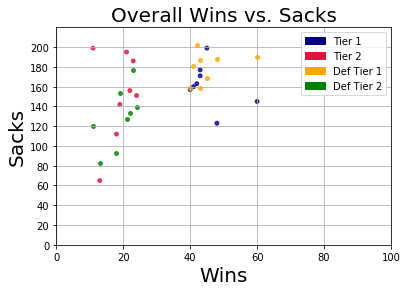

#Team Abbr.
NE     145
PIT    123
SEA    199
GB     177
KC     171
CAR    163
DEN    160
ARI    157
Name: #PassSacks, dtype: int64 #Team Abbr.
CLE    199
STL     65
SD     112
CHI    142
SF     195
TB     156
JAX    186
NYJ    151
Name: #PassSacks, dtype: int64 #Team Abbr.
NE     190
PIT    188
SEA    169
GB     187
KC     159
CAR    202
DEN    181
ARI    159
Name: #Sacks, dtype: int64 #Team Abbr.
CLE    120
STL     83
SD      93
CHI    154
SF     127
TB     133
JAX    177
NYJ    139
Name: #Sacks, dtype: int64


In [457]:
# #First Plot, QB Stats
# #If not enough colors, use facecolors= np.random.rand(3) in plt.scatter()
yplot_Pas = np.array(qb_list[14])
xplot_Pas = np.array([x1["#Wins"]])
yplot_Pas2 = np.array(qb_list2[14])
xplot_Pas2 = np.array([x2["#Wins"]])
plt.scatter(xplot_Pas2, 
            yplot_Pas2,
            s=15,
            facecolors=colors2, 
            alpha=0.8,
            linewidth=1)
plt.scatter(x=xplot_Pas, 
            y=yplot_Pas,
            s=15,
            facecolors=colors, 
            alpha=0.8,
            linewidth=1)
yplot_Pas3 = np.array(def_list[3])
xplot_Pas3 = np.array([x1["#Wins"]])
yplot_Pas4 = np.array(def_list2[3])
xplot_Pas4 = np.array([x2["#Wins"]])
plt.scatter(xplot_Pas3, 
            yplot_Pas3,
            s=15,
            facecolors="orange", 
            alpha=0.8,
            linewidth=1)
plt.scatter(x=xplot_Pas4, 
            y=yplot_Pas4,
            s=15,
            facecolors="green", 
            alpha=0.8,
            linewidth=1)
plt.grid(True)
plt.legend(handles=handles, loc="upper right")
plt.title("Overall Wins vs. Sacks", fontsize=20)
plt.ylabel("Sacks", fontsize=20)
plt.xlabel("Wins", fontsize=20)
plt.ylim(0,220)
plt.xlim(0,100)
plt.yticks(range(0, 220, 20))
plt.figure(figsize=(30,30), dpi=80)
plt.savefig("Sacks.png")
plt.show()
print(qb_list[14], qb_list2[14], def_list[3], def_list2[3])

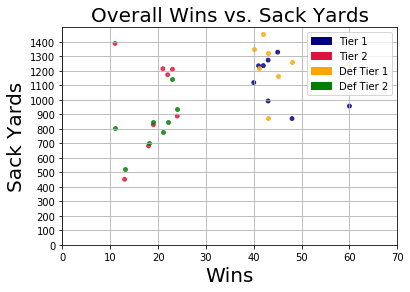

#Team Abbr.
NE      957
PIT     871
SEA    1329
GB     1274
KC      992
CAR    1236
DEN    1235
ARI    1119
Name: #PassSackY, dtype: int64 #Team Abbr.
CLE    1389
STL     452
SD      682
CHI     828
SF     1215
TB     1173
JAX    1211
NYJ     888
Name: #PassSackY, dtype: int64 #Team Abbr.
NE     1249
PIT    1261
SEA    1162
GB     1325
KC      873
CAR    1457
DEN    1223
ARI    1349
Name: #SackYds, dtype: int64 #Team Abbr.
NE     1249
PIT    1261
SEA    1162
GB     1325
KC      873
CAR    1457
DEN    1223
ARI    1349
Name: #SackYds, dtype: int64


In [456]:
yplot_Pas = np.array(qb_list[15])
xplot_Pas = np.array([x1["#Wins"]])
yplot_Pas2 = np.array(qb_list2[15])
xplot_Pas2 = np.array([x2["#Wins"]])
plt.scatter(xplot_Pas2, 
            yplot_Pas2,
            s=15,
            facecolors=colors2, 
            alpha=0.8,
            linewidth=1)
plt.scatter(x=xplot_Pas, 
            y=yplot_Pas,
            s=15,
            facecolors=colors, 
            alpha=0.8,
            linewidth=1)
yplot_Pas3 = np.array(def_list[4])
xplot_Pas3 = np.array([x1["#Wins"]])
yplot_Pas4 = np.array(def_list2[4])
xplot_Pas4 = np.array([x2["#Wins"]])
plt.scatter(xplot_Pas3, 
            yplot_Pas3,
            s=15,
            facecolors="orange", 
            alpha=0.8,
            linewidth=1)
plt.scatter(x=xplot_Pas4, 
            y=yplot_Pas4,
            s=15,
            facecolors="green", 
            alpha=0.8,
            linewidth=1)
plt.grid(True)
plt.legend(handles=handles, loc="upper right")
plt.title("Overall Wins vs. Sack Yards", fontsize=20)
plt.ylabel("Sack Yards", fontsize=20)
plt.xlabel("Wins", fontsize=20)
plt.ylim(0,1500)
plt.xlim(0,70)
plt.yticks(range(0, 1500, 100))
plt.figure(figsize=(30,30), dpi=80)
plt.savefig("SackYards.png")
plt.show()
print(qb_list[15], qb_list2[15], def_list[4], def_list[4])

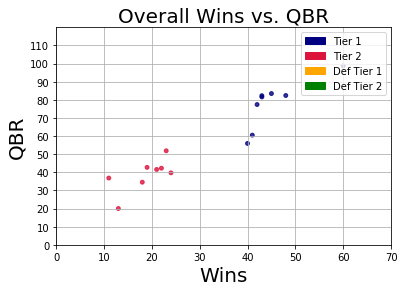

#Team Abbr.
NE     98.7250
PIT    82.4000
SEA    83.4750
GB     82.3000
KC     81.5875
CAR    77.4125
DEN    60.5250
ARI    55.9500
Name: #QBRating, dtype: float64 #Team Abbr.
CLE    36.8375
STL    20.0250
SD     34.5500
CHI    42.7375
SF     41.5750
TB     42.2750
JAX    51.8750
NYJ    39.7125
Name: #QBRating, dtype: float64


In [455]:
[ypAtt["#PassAttempts"], ypCom["#PassCompletions"], ypPct["#PassPct"], ypAPG["#PassAttemptsPerGame"], ypGY["#PassGrossYards"], 
          ypNY["#PassNetYards"], ypYPA["#PassYardsPerAtt"], ypYPG["#PassYardsPerGame"], ypTD["#PassTD"], ypTDPct["#PassTDPct"],
          ypInt["#PassInt"], ypIntPct["#PassIntPct"], ypLng["#PassLng"], ypAvg["#PassAvg"], ypSack["#PassSacks"],
          ypSackY["#PassSackY"], yp20["#Pass20Plus"], yp40["#Pass40Plus"], ypQBR["#QBRating"],
          yRAtt["#RushAttempts"], yRAPG["#RushAttemptsPerGame"], yRYds["#RushYards"], yRAvg["#RushAverage"], yRYPG["#RushYardsPerGame"], 
          yRTD["#RushTD"], yRLng["#RushLng"], yR1st["#Rush1stDowns"], yR1Pct["#Rush1stDownsPct"], yR20["#Rush20Plus"],
          yR40["#Rush40Plus"], yRFmb["#RushFumbles"], ypRec["#Receptions"], ypReYds["#RecYards"], ypRAvg["#RecAverage"],
          ypRYPG["#RecYardsPerGame"], ypRecTD["#RecTD"], ypRecLng["#RecLng"], ypRec1st["#Rec1stDowns"], ypRec20["#Rec20Plus"], 
          ypRec40["#Rec40Plus"], ypRecFmb["#RecFumbles"]]
yplot_Pas = np.array(qb_list[18]/8)
xplot_Pas = np.array([x1["#Wins"]])
yplot_Pas2 = np.array(qb_list2[18]/8)
xplot_Pas2 = np.array([x2["#Wins"]])
plt.scatter(xplot_Pas2, 
            yplot_Pas2,
            s=15,
            facecolors=colors2, 
            alpha=0.8,
            linewidth=1)
plt.scatter(x=xplot_Pas, 
            y=yplot_Pas,
            s=15,
            facecolors=colors, 
            alpha=0.8,
            linewidth=1)
plt.grid(True)
plt.legend(handles=handles, loc="upper right")
plt.title("Overall Wins vs. QBR", fontsize=20)
plt.ylabel("QBR", fontsize=20)
plt.xlabel("Wins", fontsize=20)
plt.ylim(0,120)
plt.xlim(0,70)
plt.yticks(range(0, 120, 10))
plt.figure(figsize=(30,30), dpi=80)
plt.savefig("QBR.png")
plt.show()
print(qb_list[18]/8, qb_list2[18]/8)

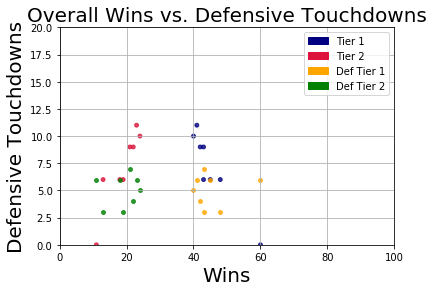

#Team Abbr.
NE      0
PIT     6
SEA     6
GB      6
KC      9
CAR     9
DEN    11
ARI    10
Name: #IntTD, dtype: int64 #Team Abbr.
CLE     6
STL     4
SD      4
CHI     4
SF      4
TB     10
JAX     5
NYJ     0
Name: #IntTD, dtype: int64 #Team Abbr.
NE     6
PIT    3
SEA    6
GB     3
KC     7
CAR    4
DEN    6
ARI    5
Name: #FumTD, dtype: int64 #Team Abbr.
CLE     1
STL     2
SD      5
CHI     2
SF      1
TB      5
JAX    10
NYJ     1
Name: #FumTD, dtype: int64


In [454]:
# #First Plot, QB Stats
# #If not enough colors, use facecolors= np.random.rand(3) in plt.scatter()
yplot_Pas = np.array(def_list[7])
xplot_Pas = np.array([x1["#Wins"]])
yplot_Pas2 = np.array(def_list[7])
xplot_Pas2 = np.array([x2["#Wins"]])
plt.scatter(xplot_Pas2, 
            yplot_Pas2,
            s=15,
            facecolors=colors2, 
            alpha=0.8,
            linewidth=1)
# xplot_Pas = np.array([x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                       x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                       x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                       x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"]])
plt.scatter(x=xplot_Pas, 
            y=yplot_Pas,
            s=15,
            facecolors=colors, 
            alpha=0.8,
            linewidth=1)
yplot_Pas3 = np.array(def_list[22])
xplot_Pas3 = np.array([x1["#Wins"]])
yplot_Pas4 = np.array(def_list[22])
xplot_Pas4 = np.array([x2["#Wins"]])
plt.scatter(xplot_Pas3, 
            yplot_Pas3,
            s=15,
            facecolors="orange", 
            alpha=0.8,
            linewidth=1)
# xplot_Pas = np.array([x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                       x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                       x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
#                       x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"]])
plt.scatter(x=xplot_Pas4, 
            y=yplot_Pas4,
            s=15,
            facecolors="green", 
            alpha=0.8,
            linewidth=1)
plt.grid(True)
plt.legend(handles=handles, loc="upper right")
plt.title("Overall Wins vs. Defensive Touchdowns", fontsize=20)
plt.ylabel("Defensive Touchdowns", fontsize=20)
plt.xlabel("Wins", fontsize=20)
plt.ylim(0,20)
plt.xlim(0,100)
plt.figure(figsize=(30,30), dpi=80)
plt.savefig("DefTD.png")
plt.show()
print(def_list[7], def_list2[7], def_list[22], def_list2[22])

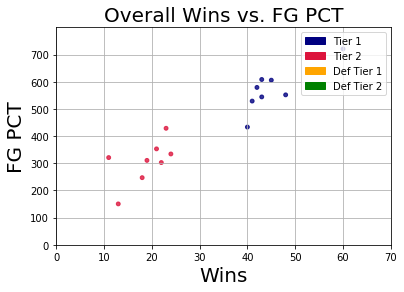

#Team Abbr.
NE     720.7
PIT    551.7
SEA    605.7
GB     608.2
KC     544.1
CAR    579.0
DEN    528.8
ARI    433.2
Name: #FgPct, dtype: float64 #Team Abbr.
CLE    320.9
STL    150.5
SD     247.0
CHI    310.6
SF     353.0
TB     302.6
JAX    428.7
NYJ    334.2
Name: #FgPct, dtype: float64


In [452]:
yplot_Pas = np.array(st_list[17])
xplot_Pas = np.array([x1["#Wins"]])
yplot_Pas2 = np.array(st_list2[17])
xplot_Pas2 = np.array([x2["#Wins"]])
plt.scatter(xplot_Pas2, 
            yplot_Pas2,
            s=15,
            facecolors=colors2, 
            alpha=0.8,
            linewidth=1)
plt.scatter(x=xplot_Pas, 
            y=yplot_Pas,
            s=15,
            facecolors=colors, 
            alpha=0.8,
            linewidth=1)
plt.grid(True)
plt.legend(handles=handles, loc="upper right")
plt.title("Overall Wins vs. FG PCT", fontsize=20)
plt.ylabel("FG PCT", fontsize=20)
plt.xlabel("Wins", fontsize=20)
plt.ylim(0,800)
plt.xlim(0,70)
plt.yticks(range(0, 800, 100))
plt.figure(figsize=(30,30), dpi=80)
plt.savefig("FG_PCt.png")
plt.show()
print(st_list[17], st_list2[17])

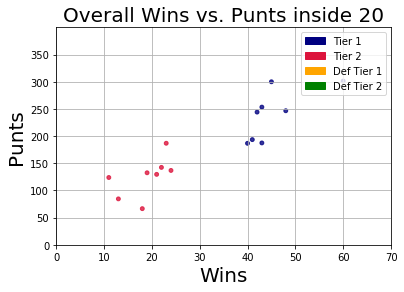

#Team Abbr.
NE     301.2
PIT    246.6
SEA    299.9
GB     187.4
KC     253.3
CAR    244.1
DEN    193.5
ARI    186.7
Name: #PuntIn20Pct, dtype: float64 #Team Abbr.
CLE    123.8
STL     84.5
SD      66.5
CHI    132.5
SF     129.6
TB     142.4
JAX    186.8
NYJ    136.8
Name: #PuntIn20Pct, dtype: float64


In [451]:
st_list = [ystKB["#KB"],ystKRRet["#KrRet"],ystKRYds["#KrYds"],ystKRAvg["#KrAvg"], ystKRLng["#KrLng"],ystKRTD["#KrTD"],
ystKR20P["#Kr20Plus"],ystKR40P["#Kr40Plus"],ystKRFC["#KrFC"],ystKRFum["#KrFum"],ystPRRet["#PrRet"],
ystPR40P["#Pr40Plus"],ystPRFC["#PrFC"],yPRFum["#PrFum"],ystFGBlk["#FgBlk"],ystFG["#FgMade"],
ystFGAtt["#FgAtt"],ystFGPct["#FgPct"],ystFGShort["#FgMade1_19"],ystFGShortAtt["#FgAtt1_19"],ystFGShortPct["#Fg1_19Pct"],
ystFG20["#FgMade20_29"],ystFG20Att["#FgAtt20_29"],ystFG20Pct["#Fg20_29Pct"],ystFG30["#FgMade30_39"],ystFG30Att["#FgAtt30_39"],
ystFG30Pct["#Fg30_39Pct"],ystFG40["#FgMade40_49"],ystFG40Att["#FgAtt40_49"],ystFG40Pct["#Fg40_49Pct"],ystFG50Pl["#FgMade50Plus"],
ystFG50PlAtt["#FgAtt50Plus"],ystFG50PlPct["#Fg50PlusPct"],ystFGLng["#FgLng"],ystXPBlk["#XpBlk"],ystXPMade["#XpMade"],
ystXPAtt["#XpAtt"],ystXPPct["#XpPct"],ystFGXP["#FgAndXpPts"],ystKOPct["#KoPct"],yKO["#Kickoffs"],
ystKOYds["#KoYds"],ystKOOOB["#KoOOB"],ystKOAvg["#KoAvg"],ystKOTB["#KoTB"],ystKOR["#KoRet"],
ystKORYds["#KoRetYds"],ystKORAvgYds["#KoRetAvgYds"],ystKOTD["#KoTD"],ystKOOnSide["#KoOS"],ystKOOnSideRec["#KoOSR"],
ystP["#Punts"],ystPYds["#PuntYds"],ystPNetYds["#PuntNetYds"],ystPLng["#PuntLng"],ystPAvg["#PuntAvg"],
ystPNetAvg["#PuntNetAvg"],ystPBlk["#PuntBlk"],ystPOOB["#PuntOOB"],ystPDown["#PuntDown"],ystP20["#PuntIn20"],
ystP20Pct["#PuntIn20Pct"],ystPTB["#PuntTB"],ystPTBPct["#PuntTBPct"],ystPFC["#PuntFC"],ystPR["#PuntRet"],
ystPRLng["#PrLng"],ystPRTD["#PrTD"],ystPR20P["#Pr20Plus"],ystPRYds["#PuntRetYds"],ystPRAvg["#PuntRetAvg"]]
yplot_Pas = np.array(st_list[61])
xplot_Pas = np.array([x1["#Wins"]])
yplot_Pas2 = np.array(st_list2[61])
xplot_Pas2 = np.array([x2["#Wins"]])
plt.scatter(xplot_Pas2,
            yplot_Pas2,
            s=15,
            facecolors=colors2, 
            alpha=0.8,
            linewidth=1)
plt.scatter(x=xplot_Pas, 
            y=yplot_Pas,
            s=15,
            facecolors=colors, 
            alpha=0.8,
            linewidth=1)
plt.grid(True)
plt.legend(handles=handles, loc="upper right")
plt.title("Overall Wins vs. Punts inside 20", fontsize=20)
plt.ylabel("Punts", fontsize=20)
plt.xlabel("Wins", fontsize=20)
plt.ylim(0,400)
plt.xlim(0,70)
plt.yticks(range(0, 400, 50))
plt.figure(figsize=(30,30), dpi=80)
plt.savefig("Punt_in_20.png")
plt.show()
print(st_list[61], st_list2[61])

# Defensive Plots

In [76]:
#Passing
# "#TackleSolo", "#TackleTotal", "#TackleAst", "#Sacks", "#SackYds", 
# "#TacklesForLoss", "#Interceptions", "#IntTD", "#IntYds", "#IntAverage", 
# "#IntLng", "#PassesDefended", "#Stuffs", "#Safeties", "#StuffYds",
# "#Fumbles", "#FumLost", "#FumForced", "#FumOwnRec", "#FumOppRec", 
# "#FumRecYds", "#FumTotalRec", "#FumTD"
#_______DEF List____________
ydTSolo = tier1["#TackleSolo"]
ydTSolo = pd.DataFrame(ydTSolo)
ydTTot = tier1["#TackleTotal"]
ydTTot = pd.DataFrame(ydTTot)
ydTAst = tier1["#TackleAst"]
ydTAst = pd.DataFrame(ydTAst)
ydSck = tier1["#Sacks"]
ydSck = pd.DataFrame(ydSck)
ydSckYds = tier1["#SackYds"]
ydSckYds = pd.DataFrame(ydSckYds)
ydTFL = tier1["#TacklesForLoss"]
ydTFL = pd.DataFrame(ydTFL)
ydInt = tier1["#Interceptions"]
ydInt = pd.DataFrame(ydInt)
ydIntTD = tier1["#IntTD"]
ydIntTD = pd.DataFrame(ydIntTD)
ydIntYds= tier1["#IntYds"]
ydIntYds = pd.DataFrame(ydIntYds)
ydIntAvg = tier1["#IntAverage"]
ydIntAvg = pd.DataFrame(ydIntAvg)
ydIntLng = tier1["#IntLng"]
ydIntLng = pd.DataFrame(ydIntLng)
ydPassDef = tier1["#PassesDefended"]
ydPassDef = pd.DataFrame(ydPassDef)
ydStuff = tier1["#Stuffs"]
ydStuff = pd.DataFrame(ydStuff)
ydSfty = tier1["#Safeties"]
ydSfty = pd.DataFrame(ydSfty)
ydStuffYds = tier1["#StuffYds"]
ydStuffYds = pd.DataFrame(ydStuffYds)
ydFmb = tier1["#Fumbles"]
ydFmb = pd.DataFrame(ydFmb)
ydFmbLst = tier1["#FumLost"]
ydFmbLst = pd.DataFrame(ydFmbLst)
ydFmbFrc = tier1["#FumForced"]
ydFmbFrc = pd.DataFrame(ydFmbFrc)
ydFmbRec = tier1["#FumOwnRec"]
ydFmbRec = pd.DataFrame(ydFmbRec)
ydFmbOppRec = tier1["#FumOppRec"]
ydFmbOppRec = pd.DataFrame(ydFmbOppRec)
ydFmbRecYds = tier1["#FumRecYds"]
ydFmbRecYds = pd.DataFrame(ydFmbRecYds)
ydFmbTotRec = tier1["#FumTotalRec"]
ydFmbTotRec = pd.DataFrame(ydFmbTotRec)
ydFmbTD = tier1["#FumTD"]
ydFmbTD = pd.DataFrame(ydFmbTD)

#_______End DEF List____________

In [77]:
#Passing
# "#TackleSolo", "#TackleTotal", "#TackleAst", "#Sacks", "#Sackyd2s", 
# "#TacklesForLoss", "#Interceptions", "#IntTD", "#Intyd2s", "#IntAverage", 
# "#IntLng", "#PassesDefended", "#Stuffs", "#Safeties", "#Stuffyd2s",
# "#Fumbles", "#FumLost", "#FumForced", "#FumOwnRec", "#FumOppRec", 
# "#FumRecyd2s", "#FumTotalRec", "#FumTD"
#_______DEF List____________
yd2TSolo = tier2["#TackleSolo"]
yd2TSolo = pd.DataFrame(yd2TSolo)
yd2TTot = tier2["#TackleTotal"]
yd2TTot = pd.DataFrame(yd2TTot)
yd2TAst = tier2["#TackleAst"]
yd2TAst = pd.DataFrame(yd2TAst)
yd2Sck = tier2["#Sacks"]
yd2Sck = pd.DataFrame(yd2Sck)
yd2SckYds = tier2["#SackYds"]
yd2SckYds = pd.DataFrame(yd2SckYds)
yd2TFL = tier2["#TacklesForLoss"]
yd2TFL = pd.DataFrame(yd2TFL)
yd2Int = tier2["#Interceptions"]
yd2Int = pd.DataFrame(yd2Int)
yd2IntTD = tier2["#IntTD"]
yd2IntTD = pd.DataFrame(yd2IntTD)
yd2IntYds= tier2["#IntYds"]
yd2IntYds = pd.DataFrame(yd2IntYds)
yd2IntAvg = tier2["#IntAverage"]
yd2IntAvg = pd.DataFrame(yd2IntAvg)
yd2IntLng = tier2["#IntLng"]
yd2IntLng = pd.DataFrame(yd2IntLng)
yd2PassDef = tier2["#PassesDefended"]
yd2PassDef = pd.DataFrame(yd2PassDef)
yd2Stuff = tier2["#Stuffs"]
yd2Stuff = pd.DataFrame(yd2Stuff)
yd2Sfty = tier2["#Safeties"]
yd2Sfty = pd.DataFrame(yd2Sfty)
yd2StuffYds = tier2["#StuffYds"]
yd2StuffYds = pd.DataFrame(yd2StuffYds)
yd2Fmb = tier2["#Fumbles"]
yd2Fmb = pd.DataFrame(yd2Fmb)
yd2FmbLst = tier2["#FumLost"]
yd2FmbLst = pd.DataFrame(yd2FmbLst)
yd2FmbFrc = tier2["#FumForced"]
yd2FmbFrc = pd.DataFrame(yd2FmbFrc)
yd2FmbRec = tier2["#FumOwnRec"]
yd2FmbRec = pd.DataFrame(yd2FmbRec)
yd2FmbOppRec = tier2["#FumOppRec"]
yd2FmbOppRec = pd.DataFrame(yd2FmbOppRec)
yd2FmbRecYds = tier2["#FumRecYds"]
yd2FmbRecYds = pd.DataFrame(yd2FmbRecYds)
yd2FmbTotRec = tier2["#FumTotalRec"]
yd2FmbTotRec = pd.DataFrame(yd2FmbTotRec)
yd2FmbTD = tier2["#FumTD"]
yd2FmbTD = pd.DataFrame(yd2FmbTD)

#_______End DEF List____________

In [78]:
def_list = [ydTSolo["#TackleSolo"],ydTTot["#TackleTotal"],ydTAst["#TackleAst"],ydSck["#Sacks"],ydSckYds["#SackYds"],
            ydTFL["#TacklesForLoss"],ydInt["#Interceptions"],ydIntTD["#IntTD"], ydIntYds["#IntYds"],ydIntAvg["#IntAverage"],
            ydIntLng["#IntLng"],ydPassDef["#PassesDefended"], ydStuff["#Stuffs"],ydSfty["#Safeties"],ydStuffYds["#StuffYds"],
            ydFmb["#Fumbles"], ydFmbLst["#FumLost"],ydFmbFrc["#FumForced"],ydFmbRec["#FumOwnRec"],ydFmbOppRec["#FumOppRec"],
            ydFmbRecYds["#FumRecYds"],ydFmbTotRec["#FumTotalRec"],ydFmbTD["#FumTD"]]

In [79]:
def_list2 = [yd2TSolo["#TackleSolo"],yd2TTot["#TackleTotal"],yd2TAst["#TackleAst"],yd2Sck["#Sacks"],yd2SckYds["#SackYds"],
            yd2TFL["#TacklesForLoss"],yd2Int["#Interceptions"],yd2IntTD["#IntTD"], yd2IntYds["#IntYds"],yd2IntAvg["#IntAverage"],
            yd2IntLng["#IntLng"],yd2PassDef["#PassesDefended"], yd2Stuff["#Stuffs"],yd2Sfty["#Safeties"],yd2StuffYds["#StuffYds"],
            yd2Fmb["#Fumbles"], yd2FmbLst["#FumLost"],yd2FmbFrc["#FumForced"],yd2FmbRec["#FumOwnRec"],yd2FmbOppRec["#FumOppRec"],
            yd2FmbRecYds["#FumRecYds"],yd2FmbTotRec["#FumTotalRec"],yd2FmbTD["#FumTD"]]

In [80]:
rushDef_list = [ydTSolo["#TackleSolo"],ydTTot["#TackleTotal"],ydTAst["#TackleAst"],ydTFL["#TacklesForLoss"], ydStuff["#Stuffs"],
                ydSfty["#Safeties"],ydStuffYds["#StuffYds"],ydFmb["#Fumbles"], ydFmbLst["#FumLost"],ydFmbFrc["#FumForced"],
                ydFmbRec["#FumOwnRec"],ydFmbOppRec["#FumOppRec"], ydFmbRecYds["#FumRecYds"],ydFmbTotRec["#FumTotalRec"],ydFmbTD["#FumTD"]]

In [81]:
rushDef_list2 = [yd2TSolo["#TackleSolo"],yd2TTot["#TackleTotal"],yd2TAst["#TackleAst"],yd2TFL["#TacklesForLoss"], yd2Stuff["#Stuffs"],
                yd2Sfty["#Safeties"],yd2StuffYds["#StuffYds"],yd2Fmb["#Fumbles"], yd2FmbLst["#FumLost"],yd2FmbFrc["#FumForced"],
                yd2FmbRec["#FumOwnRec"],yd2FmbOppRec["#FumOppRec"], yd2FmbRecYds["#FumRecYds"],yd2FmbTotRec["#FumTotalRec"],yd2FmbTD["#FumTD"]]

In [82]:
passDef_list = [ydTSolo["#TackleSolo"],ydTTot["#TackleTotal"],ydTAst["#TackleAst"],ydSck["#Sacks"], ydSckYds["#SackYds"],
                ydInt["#Interceptions"],ydIntTD["#IntTD"], ydIntYds["#IntYds"],ydIntAvg["#IntAverage"],ydIntLng["#IntLng"],
                ydPassDef["#PassesDefended"], ydSfty["#Safeties"],ydFmb["#Fumbles"], ydFmbLst["#FumLost"],ydFmbFrc["#FumForced"],
                ydFmbRec["#FumOwnRec"],ydFmbOppRec["#FumOppRec"], ydFmbRecYds["#FumRecYds"],ydFmbTotRec["#FumTotalRec"],ydFmbTD["#FumTD"]]

In [83]:
passDef_list2 = [yd2TSolo["#TackleSolo"],yd2TTot["#TackleTotal"],yd2TAst["#TackleAst"],yd2Sck["#Sacks"], yd2SckYds["#SackYds"],
                yd2Int["#Interceptions"],yd2IntTD["#IntTD"], yd2IntYds["#IntYds"],yd2IntAvg["#IntAverage"],yd2IntLng["#IntLng"],
                yd2PassDef["#PassesDefended"], yd2Sfty["#Safeties"],yd2Fmb["#Fumbles"], yd2FmbLst["#FumLost"],yd2FmbFrc["#FumForced"],
                yd2FmbRec["#FumOwnRec"],yd2FmbOppRec["#FumOppRec"], yd2FmbRecYds["#FumRecYds"],yd2FmbTotRec["#FumTotalRec"],yd2FmbTD["#FumTD"]]

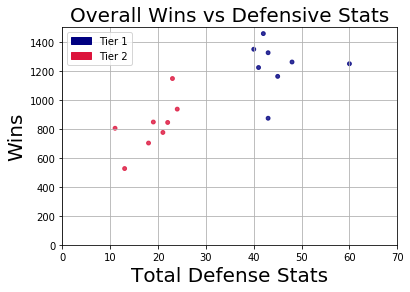

#Team Abbr.
NE     1249
PIT    1261
SEA    1162
GB     1325
KC      873
CAR    1457
DEN    1223
ARI    1349
Name: #SackYds, dtype: int64 #Team Abbr.
CLE     804
STL     526
SD      702
CHI     847
SF      775
TB      844
JAX    1147
NYJ     936
Name: #SackYds, dtype: int64


In [308]:
#First Plot, overall Def Stats
#If not enough colors, use facecolors= np.random.rand(3) in plt.scatter()
yplot_Def = np.array([def_list[4]])
xplot_Def = np.array([x1["#Wins"]])
plt.scatter(x=xplot_Def, 
            y=yplot_Def,
            s=15,
            facecolors=colors, 
            alpha=0.8,
            linewidth=1)
yplot_Def2 = np.array([def_list2[4]])
xplot_Def2 = np.array([x2["#Wins"]])
plt.scatter(x=xplot_Def2, 
            y=yplot_Def2,
            s=15,
            facecolors=colors2, 
            alpha=0.8,
            linewidth=1)
#Labels and dimensions for plot
plt.grid(True)
plt.legend(handles=handles, loc="best")
plt.title("Overall Wins vs Defensive Stats", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.ylim(0,1500)
plt.xlabel("Total Defense Stats", fontsize=20)
plt.xlim(0,70)
plt.figure(figsize=(10,10), dpi=80)
plt.show()
print(def_list[4],def_list2[4])

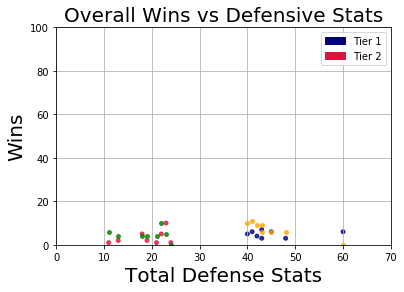

#Team Abbr.
NE      0
PIT     6
SEA     6
GB      6
KC      9
CAR     9
DEN    11
ARI    10
Name: #IntTD, dtype: int64 #Team Abbr.
NE     6
PIT    3
SEA    6
GB     3
KC     7
CAR    4
DEN    6
ARI    5
Name: #FumTD, dtype: int64 #Team Abbr.
CLE     6
STL     4
SD      4
CHI     4
SF      4
TB     10
JAX     5
NYJ     0
Name: #IntTD, dtype: int64 #Team Abbr.
CLE     1
STL     2
SD      5
CHI     2
SF      1
TB      5
JAX    10
NYJ     1
Name: #FumTD, dtype: int64


In [354]:
#First Plot, overall Def Stats
#If not enough colors, use facecolors= np.random.rand(3) in plt.scatter()
yplot_Def = np.array([def_list[22]])
xplot_Def = np.array([x1["#Wins"]])
plt.scatter(x=xplot_Def, 
            y=yplot_Def,
            s=15,
            facecolors=colors, 
            alpha=0.8,
            linewidth=1)
yplot_Def2 = np.array([def_list2[22]])
xplot_Def2 = np.array([x2["#Wins"]])
plt.scatter(x=xplot_Def2, 
            y=yplot_Def2,
            s=15,
            facecolors=colors2, 
            alpha=0.8,
            linewidth=1)
yplot_Def3 = np.array([def_list[7]])
xplot_Def3 = np.array([x1["#Wins"]])
plt.scatter(x=xplot_Def3, 
            y=yplot_Def3,
            s=15,
            facecolors="orange", 
            alpha=0.8,
            linewidth=1)
yplot_Def4 = np.array([def_list2[7]])
xplot_Def4 = np.array([x2["#Wins"]])
plt.scatter(x=xplot_Def4, 
            y=yplot_Def4,
            s=15,
            facecolors="green", 
            alpha=0.8,
            linewidth=1)
#Labels and dimensions for plot
plt.grid(True)
plt.legend(handles=handles, loc="best")
plt.title("Overall Wins vs Defensive Stats", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.ylim(0,100)
plt.xlabel("Total Defense Stats", fontsize=20)
plt.xlim(0,70)
plt.figure(figsize=(10,10), dpi=80)
plt.show()
print(def_list[7],def_list[22],def_list2[7],def_list2[22])
# [ydTSolo["#TackleSolo"],ydTTot["#TackleTotal"],ydTAst["#TackleAst"],ydSck["#Sacks"],ydSckYds["#SackYds"],
#             ydTFL["#TacklesForLoss"],ydInt["#Interceptions"],ydIntTD["#IntTD"], ydIntYds["#IntYds"],ydIntAvg["#IntAverage"],
#             ydIntLng["#IntLng"],ydPassDef["#PassesDefended"], ydStuff["#Stuffs"],ydSfty["#Safeties"],ydStuffYds["#StuffYds"],
#             ydFmb["#Fumbles"], ydFmbLst["#FumLost"],ydFmbFrc["#FumForced"],ydFmbRec["#FumOwnRec"],ydFmbOppRec["#FumOppRec"],
#             ydFmbRecYds["#FumRecYds"],ydFmbTotRec["#FumTotalRec"],ydFmbTD["#FumTD"]]

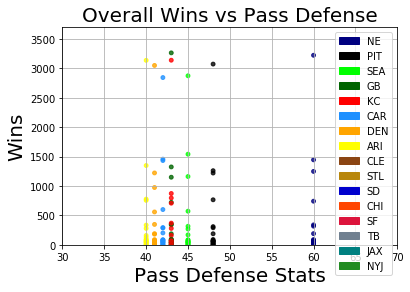

In [86]:
yplot_Def = np.array([passDef_list])

xplot_Def = np.array([x1["#Wins"]])

plt.scatter(x=xplot_Def, 
            y=yplot_Def,
            s=15,
            facecolors=colors, 
            alpha=0.8,
            linewidth=1)
plt.grid(True)
plt.legend(handles= handles)
plt.title("Overall Wins vs Pass Defense", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.ylim(0,3700)
plt.xlabel("Pass Defense Stats", fontsize=20)
plt.xlim(30,70)
plt.figure(figsize=(10,10), dpi=80)
plt.show()

# Special Teams Plots

In [91]:
#Special Teams 1
ystKB = tier1["#KB"]
ystKB = pd.DataFrame(ystKB)
ystKRRet = tier1["#KrRet"]
ystKRRet = pd.DataFrame(ystKRRet)
ystKRYds = tier1["#KrYds"]
ystKRYds = pd.DataFrame(ystKRYds)
ystKRAvg = tier1["#KrAvg"]
ystKRAvg = pd.DataFrame(ystKRAvg)
ystKRLng = tier1["#KrLng"]
ystKRLng = pd.DataFrame(ystKRLng)
ystKRTD = tier1["#KrTD"]
ystKRTD = pd.DataFrame(ystKRTD)
ystKR20P = tier1["#Kr20Plus"]
ystKR20P = pd.DataFrame(ystKR20P)
ystKR40P = tier1["#Kr40Plus"]
ystKR40P = pd.DataFrame(ystKR40P)
ystKRFC= tier1["#KrFC"]
ystKRFC = pd.DataFrame(ystKRFC)
ystKRFum = tier1["#KrFum"]
ystKRFum = pd.DataFrame(ystKRFum)
ystPRRet = tier1["#PrRet"]
ystPRRet = pd.DataFrame(ystPRRet)
ystPRYds = tier1["#PrYds"]
ystPRYds = pd.DataFrame(ystPRYds)
ystPRAvg = tier1["#PrAvg"]
ystPRAvg = pd.DataFrame(ystPRAvg)
ystPRLng = tier1["#PrLng"]
ystPRLng = pd.DataFrame(ystPRLng)
ystPRTD = tier1["#PrTD"]
ystPRTD = pd.DataFrame(ystPRTD)
ystPR20P = tier1["#Pr20Plus"]
ystPR20P = pd.DataFrame(ystPR20P)
ystPR40P = tier1["#Pr40Plus"]
ystPR40P = pd.DataFrame(ystPR40P)
ystPRFC = tier1["#PrFC"]
ystPRFC = pd.DataFrame(ystPRFC)
yPRFum = tier1["#PrFum"]
yPRFum = pd.DataFrame(yPRFum)
ystFGBlk = tier1["#FgBlk"]
ystFGBlk = pd.DataFrame(ystFGBlk)
ystFG = tier1["#FgMade"]
ystFG = pd.DataFrame(ystFG)
ystFGAtt = tier1["#FgAtt"]
ystFGAtt = pd.DataFrame(ystFGAtt)
ystFGPct = tier1["#FgPct"]
ystFGPct = pd.DataFrame(ystFGPct)
ystFGShort = tier1["#FgMade1_19"]
ystFGShort = pd.DataFrame(ystFGShort)
ystFGShortAtt = tier1["#FgAtt1_19"]
ystFGShortAtt = pd.DataFrame(ystFGShortAtt)
ystFGShortPct = tier1["#Fg1_19Pct"]
ystFGShortPct = pd.DataFrame(ystFGShortPct)
ystFG20 = tier1["#FgMade20_29"]
ystFG20 = pd.DataFrame(ystFG20)
ystFG20Att = tier1["#FgAtt20_29"]
ystFG20Att = pd.DataFrame(ystFG20Att)
ystFG20Pct = tier1["#Fg20_29Pct"]
ystFG20Pct = pd.DataFrame(ystFG20Pct)
ystFG30 = tier1["#FgMade30_39"]
ystFG30 = pd.DataFrame(ystFG30)
ystFG30Att = tier1["#FgAtt30_39"]
ystFG30Att = pd.DataFrame(ystFG30Att)
ystFG30Pct = tier1["#Fg30_39Pct"]
ystFG30Pct = pd.DataFrame(ystFG30Pct)
ystFG40 = tier1["#FgMade40_49"]
ystFG40 = pd.DataFrame(ystFG40)
ystFG40Att = tier1["#FgAtt40_49"]
ystFG40Att = pd.DataFrame(ystFG40Att)
ystFG40Pct = tier1["#Fg40_49Pct"]
ystFG40Pct = pd.DataFrame(ystFG40Pct)
ystFG50Pl = tier1["#FgMade50Plus"]
ystFG50Pl = pd.DataFrame(ystFG50Pl)
ystFG50PlAtt = tier1["#FgAtt50Plus"]
ystFG50PlAtt = pd.DataFrame(ystFG50PlAtt)
ystFG50PlPct = tier1["#Fg50PlusPct"]
ystFG50PlPct = pd.DataFrame(ystFG50PlPct)
ystFGLng = tier1["#FgLng"]
ystFGLng = pd.DataFrame(ystFGLng)
ystXPBlk = tier1["#XpBlk"]
ystXPBlk = pd.DataFrame(ystXPBlk)
ystXPMade = tier1["#XpMade"]
ystXPMade = pd.DataFrame(ystXPMade)
ystXPAtt = tier1["#XpAtt"]
ystXPAtt = pd.DataFrame(ystXPAtt)
ystXPPct = tier1["#XpPct"]
ystXPPct = pd.DataFrame(ystXPPct)
ystFGXP = tier1["#FgAndXpPts"]
ystFGXP = pd.DataFrame(ystFGXP)
ystKOPct = tier1["#KoPct"]
ystKOPct = pd.DataFrame(ystKOPct)
yKO = tier1["#Kickoffs"]
yKO = pd.DataFrame(yKO)
ystKOYds = tier1["#KoYds"]
ystKOYds = pd.DataFrame(ystKOYds)
ystKOOOB = tier1["#KoOOB"]
ystKOOOB = pd.DataFrame(ystKOOOB)
ystKOAvg = tier1["#KoAvg"]
ystKOAvg = pd.DataFrame(ystKOAvg)
ystKOTB = tier1["#KoTB"]
ystKOTB = pd.DataFrame(ystKOTB)
ystKOR = tier1["#KoRet"]
ystKOR = pd.DataFrame(ystKOR)
ystKORYds = tier1["#KoRetYds"]
ystKORYds = pd.DataFrame(ystKORYds)
ystKORAvgYds = tier1["#KoRetAvgYds"]
ystKORAvgYds = pd.DataFrame(ystKORAvgYds)
ystKOTD = tier1["#KoTD"]
ystKOTD = pd.DataFrame(ystKOTD)
ystKOOnSide = tier1["#KoOS"]
ystKOOnSide = pd.DataFrame(ystKOOnSide)
ystKOOnSideRec = tier1["#KoOSR"]
ystKOOnSideRec = pd.DataFrame(ystKOOnSideRec)
ystP = tier1["#Punts"]
ystP = pd.DataFrame(ystP)
ystPYds = tier1["#PuntYds"]
ystPYds = pd.DataFrame(ystPYds)
ystPNetYds = tier1["#PuntNetYds"]
ystPNetYds = pd.DataFrame(ystPNetYds)
ystPLng = tier1["#PuntLng"]
ystPLng = pd.DataFrame(ystPLng)
ystPAvg = tier1["#PuntAvg"]
ystPAvg = pd.DataFrame(ystPAvg)
ystPNetAvg = tier1["#PuntNetAvg"]
ystPNetAvg = pd.DataFrame(ystPNetAvg)
ystPBlk = tier1["#PuntBlk"]
ystPBlk = pd.DataFrame(ystPBlk)
ystPOOB = tier1["#PuntOOB"]
ystPOOB = pd.DataFrame(ystPOOB)
ystPDown = tier1["#PuntDown"]
ystPDown = pd.DataFrame(ystPDown)
ystP20 = tier1["#PuntIn20"]
ystP20 = pd.DataFrame(ystP20)
ystP20Pct = tier1["#PuntIn20Pct"]
ystP20Pct = pd.DataFrame(ystP20Pct)
ystPTB = tier1["#PuntTB"]
ystPTB = pd.DataFrame(ystPTB)
ystPTBPct = tier1["#PuntTBPct"]
ystPTBPct = pd.DataFrame(ystPTBPct)
ystPFC = tier1["#PuntFC"]
ystPFC = pd.DataFrame(ystPFC)
ystPR = tier1["#PuntRet"]
ystPR = pd.DataFrame(ystPR)
ystPRYds = tier1["#PuntRetYds"]
ystPRYds = pd.DataFrame(ystPRYds)
ystPRAvg = tier1["#PuntRetAvg"]
ystPRAvg = pd.DataFrame(ystPRAvg)

In [92]:
#Tier2 Special Teams

yst2KB = tier2["#KB"]
yst2KB = pd.DataFrame(yst2KB)
yst2KRRet = tier2["#KrRet"]
yst2KRRet = pd.DataFrame(yst2KRRet)
yst2KRYds = tier2["#KrYds"]
yst2KRYds = pd.DataFrame(yst2KRYds)
yst2KRAvg = tier2["#KrAvg"]
yst2KRAvg = pd.DataFrame(yst2KRAvg)
yst2KRLng = tier2["#KrLng"]
yst2KRLng = pd.DataFrame(yst2KRLng)
yst2KRTD = tier2["#KrTD"]
yst2KRTD = pd.DataFrame(yst2KRTD)
yst2KR20P = tier2["#Kr20Plus"]
yst2KR20P = pd.DataFrame(yst2KR20P)
yst2KR40P = tier2["#Kr40Plus"]
yst2KR40P = pd.DataFrame(yst2KR40P)
yst2KRFC= tier2["#KrFC"]
yst2KRFC = pd.DataFrame(yst2KRFC)
yst2KRFum = tier2["#KrFum"]
yst2KRFum = pd.DataFrame(yst2KRFum)
yst2PRRet = tier2["#PrRet"]
yst2PRRet = pd.DataFrame(yst2PRRet)
yst2PRYds = tier2["#PrYds"]
yst2PRYds = pd.DataFrame(yst2PRYds)
yst2PRAvg = tier2["#PrAvg"]
yst2PRAvg = pd.DataFrame(yst2PRAvg)
yst2PRLng = tier2["#PrLng"]
yst2PRLng = pd.DataFrame(yst2PRLng)
yst2PRTD = tier2["#PrTD"]
yst2PRTD = pd.DataFrame(yst2PRTD)
yst2PR20P = tier2["#Pr20Plus"]
yst2PR20P = pd.DataFrame(yst2PR20P)
yst2PR40P = tier2["#Pr40Plus"]
yst2PR40P = pd.DataFrame(yst2PR40P)
yst2PRFC = tier2["#PrFC"]
yst2PRFC = pd.DataFrame(yst2PRFC)
yPRFum = tier2["#PrFum"]
yPRFum = pd.DataFrame(yPRFum)
yst2FGBlk = tier2["#FgBlk"]
yst2FGBlk = pd.DataFrame(yst2FGBlk)
yst2FG = tier2["#FgMade"]
yst2FG = pd.DataFrame(yst2FG)
yst2FGAtt = tier2["#FgAtt"]
yst2FGAtt = pd.DataFrame(yst2FGAtt)
yst2FGPct = tier2["#FgPct"]
yst2FGPct = pd.DataFrame(yst2FGPct)
yst2FGShort = tier2["#FgMade1_19"]
yst2FGShort = pd.DataFrame(yst2FGShort)
yst2FGShortAtt = tier2["#FgAtt1_19"]
yst2FGShortAtt = pd.DataFrame(yst2FGShortAtt)
yst2FGShortPct = tier2["#Fg1_19Pct"]
yst2FGShortPct = pd.DataFrame(yst2FGShortPct)
yst2FG20 = tier2["#FgMade20_29"]
yst2FG20 = pd.DataFrame(yst2FG20)
yst2FG20Att = tier2["#FgAtt20_29"]
yst2FG20Att = pd.DataFrame(yst2FG20Att)
yst2FG20Pct = tier2["#Fg20_29Pct"]
yst2FG20Pct = pd.DataFrame(yst2FG20Pct)
yst2FG30 = tier2["#FgMade30_39"]
yst2FG30 = pd.DataFrame(yst2FG30)
yst2FG30Att = tier2["#FgAtt30_39"]
yst2FG30Att = pd.DataFrame(yst2FG30Att)
yst2FG30Pct = tier2["#Fg30_39Pct"]
yst2FG30Pct = pd.DataFrame(yst2FG30Pct)
yst2FG40 = tier2["#FgMade40_49"]
yst2FG40 = pd.DataFrame(yst2FG40)
yst2FG40Att = tier2["#FgAtt40_49"]
yst2FG40Att = pd.DataFrame(yst2FG40Att)
yst2FG40Pct = tier2["#Fg40_49Pct"]
yst2FG40Pct = pd.DataFrame(yst2FG40Pct)
yst2FG50Pl = tier2["#FgMade50Plus"]
yst2FG50Pl = pd.DataFrame(yst2FG50Pl)
yst2FG50PlAtt = tier2["#FgAtt50Plus"]
yst2FG50PlAtt = pd.DataFrame(yst2FG50PlAtt)
yst2FG50PlPct = tier2["#Fg50PlusPct"]
yst2FG50PlPct = pd.DataFrame(yst2FG50PlPct)
yst2FGLng = tier2["#FgLng"]
yst2FGLng = pd.DataFrame(yst2FGLng)
yst2XPBlk = tier2["#XpBlk"]
yst2XPBlk = pd.DataFrame(yst2XPBlk)
yst2XPMade = tier2["#XpMade"]
yst2XPMade = pd.DataFrame(yst2XPMade)
yst2XPAtt = tier2["#XpAtt"]
yst2XPAtt = pd.DataFrame(yst2XPAtt)
yst2XPPct = tier2["#XpPct"]
yst2XPPct = pd.DataFrame(yst2XPPct)
yst2FGXP = tier2["#FgAndXpPts"]
yst2FGXP = pd.DataFrame(yst2FGXP)
yst2KOPct = tier2["#KoPct"]
yst2KOPct = pd.DataFrame(yst2KOPct)
yKO = tier2["#Kickoffs"]
yKO = pd.DataFrame(yKO)
yst2KOYds = tier2["#KoYds"]
yst2KOYds = pd.DataFrame(yst2KOYds)
yst2KOOOB = tier2["#KoOOB"]
yst2KOOOB = pd.DataFrame(yst2KOOOB)
yst2KOAvg = tier2["#KoAvg"]
yst2KOAvg = pd.DataFrame(yst2KOAvg)
yst2KOTB = tier2["#KoTB"]
yst2KOTB = pd.DataFrame(yst2KOTB)
yst2KOR = tier2["#KoRet"]
yst2KOR = pd.DataFrame(yst2KOR)
yst2KORYds = tier2["#KoRetYds"]
yst2KORYds = pd.DataFrame(yst2KORYds)
yst2KORAvgYds = tier2["#KoRetAvgYds"]
yst2KORAvgYds = pd.DataFrame(yst2KORAvgYds)
yst2KOTD = tier2["#KoTD"]
yst2KOTD = pd.DataFrame(yst2KOTD)
yst2KOOnSide = tier2["#KoOS"]
yst2KOOnSide = pd.DataFrame(yst2KOOnSide)
yst2KOOnSideRec = tier2["#KoOSR"]
yst2KOOnSideRec = pd.DataFrame(yst2KOOnSideRec)
yst2P = tier2["#Punts"]
yst2P = pd.DataFrame(yst2P)
yst2PYds = tier2["#PuntYds"]
yst2PYds = pd.DataFrame(yst2PYds)
yst2PNetYds = tier2["#PuntNetYds"]
yst2PNetYds = pd.DataFrame(yst2PNetYds)
yst2PLng = tier2["#PuntLng"]
yst2PLng = pd.DataFrame(yst2PLng)
yst2PAvg = tier2["#PuntAvg"]
yst2PAvg = pd.DataFrame(yst2PAvg)
yst2PNetAvg = tier2["#PuntNetAvg"]
yst2PNetAvg = pd.DataFrame(yst2PNetAvg)
yst2PBlk = tier2["#PuntBlk"]
yst2PBlk = pd.DataFrame(yst2PBlk)
yst2POOB = tier2["#PuntOOB"]
yst2POOB = pd.DataFrame(yst2POOB)
yst2PDown = tier2["#PuntDown"]
yst2PDown = pd.DataFrame(yst2PDown)
yst2P20 = tier2["#PuntIn20"]
yst2P20 = pd.DataFrame(yst2P20)
yst2P20Pct = tier2["#PuntIn20Pct"]
yst2P20Pct = pd.DataFrame(yst2P20Pct)
yst2PTB = tier2["#PuntTB"]
yst2PTB = pd.DataFrame(yst2PTB)
yst2PTBPct = tier2["#PuntTBPct"]
yst2PTBPct = pd.DataFrame(yst2PTBPct)
yst2PFC = tier2["#PuntFC"]
yst2PFC = pd.DataFrame(yst2PFC)
yst2PR = tier2["#PuntRet"]
yst2PR = pd.DataFrame(yst2PR)
yst2PRYds = tier2["#PuntRetYds"]
yst2PRYds = pd.DataFrame(yst2PRYds)
yst2PRAvg = tier2["#PuntRetAvg"]
yst2PRAvg = pd.DataFrame(yst2PRAvg)

In [93]:
#Special Teams Plot Variable List 
st_list = [ystKB["#KB"],ystKRRet["#KrRet"],ystKRYds["#KrYds"],ystKRAvg["#KrAvg"], ystKRLng["#KrLng"],ystKRTD["#KrTD"],
ystKR20P["#Kr20Plus"],ystKR40P["#Kr40Plus"],ystKRFC["#KrFC"],ystKRFum["#KrFum"],ystPRRet["#PrRet"],
ystPR40P["#Pr40Plus"],ystPRFC["#PrFC"],yPRFum["#PrFum"],ystFGBlk["#FgBlk"],ystFG["#FgMade"],
ystFGAtt["#FgAtt"],ystFGPct["#FgPct"],ystFGShort["#FgMade1_19"],ystFGShortAtt["#FgAtt1_19"],ystFGShortPct["#Fg1_19Pct"],
ystFG20["#FgMade20_29"],ystFG20Att["#FgAtt20_29"],ystFG20Pct["#Fg20_29Pct"],ystFG30["#FgMade30_39"],ystFG30Att["#FgAtt30_39"],
ystFG30Pct["#Fg30_39Pct"],ystFG40["#FgMade40_49"],ystFG40Att["#FgAtt40_49"],ystFG40Pct["#Fg40_49Pct"],ystFG50Pl["#FgMade50Plus"],
ystFG50PlAtt["#FgAtt50Plus"],ystFG50PlPct["#Fg50PlusPct"],ystFGLng["#FgLng"],ystXPBlk["#XpBlk"],ystXPMade["#XpMade"],
ystXPAtt["#XpAtt"],ystXPPct["#XpPct"],ystFGXP["#FgAndXpPts"],ystKOPct["#KoPct"],yKO["#Kickoffs"],
ystKOYds["#KoYds"],ystKOOOB["#KoOOB"],ystKOAvg["#KoAvg"],ystKOTB["#KoTB"],ystKOR["#KoRet"],
ystKORYds["#KoRetYds"],ystKORAvgYds["#KoRetAvgYds"],ystKOTD["#KoTD"],ystKOOnSide["#KoOS"],ystKOOnSideRec["#KoOSR"],
ystP["#Punts"],ystPYds["#PuntYds"],ystPNetYds["#PuntNetYds"],ystPLng["#PuntLng"],ystPAvg["#PuntAvg"],
ystPNetAvg["#PuntNetAvg"],ystPBlk["#PuntBlk"],ystPOOB["#PuntOOB"],ystPDown["#PuntDown"],ystP20["#PuntIn20"],
ystP20Pct["#PuntIn20Pct"],ystPTB["#PuntTB"],ystPTBPct["#PuntTBPct"],ystPFC["#PuntFC"],ystPR["#PuntRet"],
ystPRLng["#PrLng"],ystPRTD["#PrTD"],ystPR20P["#Pr20Plus"],ystPRYds["#PuntRetYds"],ystPRAvg["#PuntRetAvg"]]

#_______End Special Teams List____________

In [94]:
#Special Teams 2 Plot Variable List
st_list2 = [yst2KB["#KB"],yst2KRRet["#KrRet"],yst2KRYds["#KrYds"],yst2KRAvg["#KrAvg"], yst2KRLng["#KrLng"],yst2KRTD["#KrTD"],
yst2KR20P["#Kr20Plus"],yst2KR40P["#Kr40Plus"],yst2KRFC["#KrFC"],yst2KRFum["#KrFum"],yst2PRRet["#PrRet"],
yst2PR40P["#Pr40Plus"],yst2PRFC["#PrFC"],yPRFum["#PrFum"],yst2FGBlk["#FgBlk"],yst2FG["#FgMade"],
yst2FGAtt["#FgAtt"],yst2FGPct["#FgPct"],yst2FGShort["#FgMade1_19"],yst2FGShortAtt["#FgAtt1_19"],yst2FGShortPct["#Fg1_19Pct"],
yst2FG20["#FgMade20_29"],yst2FG20Att["#FgAtt20_29"],yst2FG20Pct["#Fg20_29Pct"],yst2FG30["#FgMade30_39"],yst2FG30Att["#FgAtt30_39"],
yst2FG30Pct["#Fg30_39Pct"],yst2FG40["#FgMade40_49"],yst2FG40Att["#FgAtt40_49"],yst2FG40Pct["#Fg40_49Pct"],yst2FG50Pl["#FgMade50Plus"],
yst2FG50PlAtt["#FgAtt50Plus"],yst2FG50PlPct["#Fg50PlusPct"],yst2FGLng["#FgLng"],yst2XPBlk["#XpBlk"],yst2XPMade["#XpMade"],
yst2XPAtt["#XpAtt"],yst2XPPct["#XpPct"],yst2FGXP["#FgAndXpPts"],yst2KOPct["#KoPct"],yKO["#Kickoffs"],
yst2KOYds["#KoYds"],yst2KOOOB["#KoOOB"],yst2KOAvg["#KoAvg"],yst2KOTB["#KoTB"],yst2KOR["#KoRet"],
yst2KORYds["#KoRetYds"],yst2KORAvgYds["#KoRetAvgYds"],yst2KOTD["#KoTD"],yst2KOOnSide["#KoOS"],yst2KOOnSideRec["#KoOSR"],
yst2P["#Punts"],yst2PYds["#PuntYds"],yst2PNetYds["#PuntNetYds"],yst2PLng["#PuntLng"],yst2PAvg["#PuntAvg"],
yst2PNetAvg["#PuntNetAvg"],yst2PBlk["#PuntBlk"],yst2POOB["#PuntOOB"],yst2PDown["#PuntDown"],yst2P20["#PuntIn20"],
yst2P20Pct["#PuntIn20Pct"],yst2PTB["#PuntTB"],yst2PTBPct["#PuntTBPct"],yst2PFC["#PuntFC"],yst2PR["#PuntRet"],
yst2PRLng["#PrLng"],yst2PRTD["#PrTD"],yst2PR20P["#Pr20Plus"],yst2PRYds["#PuntRetYds"],yst2PRAvg["#PuntRetAvg"]]

#_______End Special Teams List____________

In [141]:
# #ST Lists
ST_X_Array = [x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"]]

FG_list = [ystFGAtt["#FgAtt"],ystFGPct["#FgPct"],ystFGShort["#FgMade1_19"],ystFGShortAtt["#FgAtt1_19"],ystFGShortPct["#Fg1_19Pct"],
       ystFG20["#FgMade20_29"],ystFG20Att["#FgAtt20_29"],ystFG20Pct["#Fg20_29Pct"],ystFG30["#FgMade30_39"],ystFG30Att["#FgAtt30_39"],
       ystFG30Pct["#Fg30_39Pct"],ystFG40["#FgMade40_49"],ystFG40Att["#FgAtt40_49"],ystFG40Pct["#Fg40_49Pct"],ystFG50Pl["#FgMade50Plus"],   
       ystFG50PlAtt["#FgAtt50Plus"],ystFG50PlPct["#Fg50PlusPct"],ystFGLng["#FgLng"]]

FG_Array = ([x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
                     x1["#Wins"], x1["#Wins"], x1["#Wins"]
                     ])

KO_list = [[ystKOPct["#KoPct"], yKO["#Kickoffs"], ystKOYds["#KoYds"], ystKOOOB["#KoOOB"], ystKOAvg["#KoAvg"],
            ystKOTB["#KoTB"], ystKOR["#KoRet"], ystKORYds["#KoRetYds"], ystKORAvgYds["#KoRetAvgYds"], ystKOTD["#KoTD"],
            ystKOOnSide["#KoOS"], ystKOOnSideRec["#KoOSR"], ystKOPct["#KoPct"], yKO["#Kickoffs"], ystKOYds["#KoYds"],
            ystKOOOB["#KoOOB"], ystKOAvg["#KoAvg"], ystKOTB["#KoTB"], ystKOTD["#KoTD"], ystKOOnSide["#KoOS"], 
            ystKOOnSideRec["#KoOSR"]]]

KO_Array = [[x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"]
                     ]]
           
KOR_list = [[ystKB["#KB"],ystKRRet["#KrRet"],ystKRYds["#KrYds"],ystKRAvg["#KrAvg"], ystKRLng["#KrLng"],
             ystKRTD["#KrTD"], ystKR20P["#Kr20Plus"],ystKR40P["#Kr40Plus"],ystKRFC["#KrFC"],ystKRFum["#KrFum"], 
             ystKOR["#KoRet"], ystKORYds["#KoRetYds"],ystKORAvgYds["#KoRetAvgYds"], ystKB["#KB"],ystKRRet["#KrRet"],
             ystKRYds["#KrYds"],ystKRAvg["#KrAvg"], ystKRLng["#KrLng"],ystKRTD["#KrTD"],ystKR20P["#Kr20Plus"],
             ystKR40P["#Kr40Plus"], ystKRFC["#KrFC"], ystKRFum["#KrFum"], ystKOR["#KoRet"], ystKORYds["#KoRetYds"],
             ystKORAvgYds["#KoRetAvgYds"],ystKOTD["#KoTD"], ystKOOnSide["#KoOS"], ystKOOnSideRec["#KoOSR"]]]
KOR_Array = [[x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"]
                     ]]

Punt_list = [[ystP["#Punts"], ystPYds["#PuntYds"], ystPNetYds["#PuntNetYds"], ystPLng["#PuntLng"], ystPAvg["#PuntAvg"], 
              ystPNetAvg["#PuntNetAvg"], ystPBlk["#PuntBlk"], ystPOOB["#PuntOOB"], ystPDown["#PuntDown"], ystP20["#PuntIn20"],
              ystP20Pct["#PuntIn20Pct"], ystPTB["#PuntTB"], ystPTBPct["#PuntTBPct"], ystPFC["#PuntFC"], ystP["#Punts"],
              ystPYds["#PuntYds"], ystPNetYds["#PuntNetYds"], ystPLng["#PuntLng"], ystPAvg["#PuntAvg"], ystPNetAvg["#PuntNetAvg"],
              ystPBlk["#PuntBlk"], ystPOOB["#PuntOOB"], ystPDown["#PuntDown"], ystP20["#PuntIn20"], ystP20Pct["#PuntIn20Pct"],
              ystPTB["#PuntTB"],ystPTBPct["#PuntTBPct"],ystPFC["#PuntFC"]]]
Punt_Array = [[x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"], x1["#Wins"], x1["#Wins"]
                     ]]

PR_list = [ystPRLng["#PrLng"],ystPRTD["#PrTD"],ystPR20P["#Pr20Plus"],ystPRYds["#PuntRetYds"],ystPRAvg["#PuntRetAvg"],
           ystPR40P["#Pr40Plus"],ystPRFC["#PrFC"],yPRFum["#PrFum"],ystPRRet["#PrRet"], ystPR["#PuntRet"]]

PR_Array = [x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"]]

XP_list = [ystXPBlk["#XpBlk"],ystXPMade["#XpMade"],ystXPAtt["#XpAtt"],ystXPPct["#XpPct"]]


XP_Array =[x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"]]
           
FGXP_list = [ystFGAtt["#FgAtt"],ystFGPct["#FgPct"],ystFGShort["#FgMade1_19"],ystFGShortAtt["#FgAtt1_19"],ystFGShortPct["#Fg1_19Pct"],
       ystFG20["#FgMade20_29"],ystFG20Att["#FgAtt20_29"],ystFG20Pct["#Fg20_29Pct"],ystFG30["#FgMade30_39"],ystFG30Att["#FgAtt30_39"],
       ystFG30Pct["#Fg30_39Pct"],ystFG40["#FgMade40_49"],ystFG40Att["#FgAtt40_49"],ystFG40Pct["#Fg40_49Pct"],ystFG50Pl["#FgMade50Plus"],   
       ystFG50PlAtt["#FgAtt50Plus"],ystFG50PlPct["#Fg50PlusPct"],ystFGLng["#FgLng"], ystXPBlk["#XpBlk"],ystXPMade["#XpMade"],
           ystXPAtt["#XpAtt"],ystXPPct["#XpPct"], ystFGXP["#FgAndXpPts"]]
FGXP_Array = [x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
               x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
               x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
               x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
               x1["#Wins"], x1["#Wins"], x1["#Wins"]]

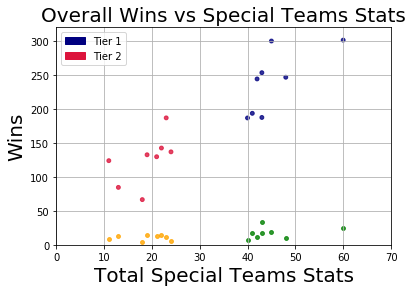

#Team Abbr.
NE     301.2
PIT    246.6
SEA    299.9
GB     187.4
KC     253.3
CAR    244.1
DEN    193.5
ARI    186.7
Name: #PuntIn20Pct, dtype: float64 #Team Abbr.
NE     25
PIT    10
SEA    19
GB     17
KC     34
CAR    12
DEN    17
ARI     7
Name: #Pr20Plus, dtype: int64 #Team Abbr.
CLE    123.8
STL     84.5
SD      66.5
CHI    132.5
SF     129.6
TB     142.4
JAX    186.8
NYJ    136.8
Name: #PuntIn20Pct, dtype: float64 #Team Abbr.
CLE     9
STL    13
SD      4
CHI    14
SF     13
TB     14
JAX    12
NYJ     5
Name: #Pr20Plus, dtype: int64


In [395]:
yplot_ST = np.array([st_list[61]])
xplot_ST = np.array([x1["#Wins"]])
plt.scatter(x=xplot_ST, 
            y=yplot_ST,
            s=15,
            facecolors=colors, 
            alpha=0.8,
            linewidth=1)
yplot_ST2 = np.array([st_list[68]])
xplot_ST2 = np.array([x1["#Wins"]])
plt.scatter(x=xplot_ST2, 
            y=yplot_ST2,
            s=15,
            facecolors="green", 
            alpha=0.8,
            linewidth=1)
yplot_ST3 = np.array([st_list2[61]])
xplot_ST3 = np.array([x2["#Wins"]])
plt.scatter(x=xplot_ST3, 
            y=yplot_ST3,
            s=15,
            facecolors=colors2, 
            alpha=0.8,
            linewidth=1)
yplot_ST4 = np.array([st_list2[68]])
xplot_ST4 = np.array([x2["#Wins"]])
plt.scatter(x=xplot_ST4, 
            y=yplot_ST4,
            s=15,
            facecolors="orange", 
            alpha=0.8,
            linewidth=1)
plt.grid(True)
plt.legend(handles=handles)
plt.title("Overall Wins vs Special Teams Stats", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.ylim(0,320)
plt.xlabel("Total Special Teams Stats", fontsize=20)
plt.xlim(0,70)
plt.figure(figsize=(10,10), dpi=80)
plt.show()
print(st_list[61], st_list[68], st_list2[61], st_list2[68])

### FG Plots

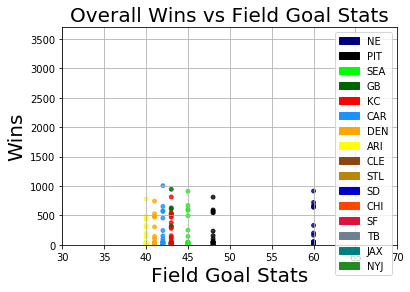

In [143]:
yplot_ST = np.array([FG_list])

xplot_ST = np.array([FG_Array
                     ])
plt.scatter(x=xplot_ST, 
            y=yplot_ST,
            s=15,
            facecolors=colors, 
            alpha=0.8,
            linewidth=1)

plt.grid(True)
plt.legend(handles= handles)
plt.title("Overall Wins vs Field Goal Stats", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.ylim(0,3700)
plt.xlabel("Field Goal Stats", fontsize=20)
plt.xlim(30,70)
plt.figure(figsize=(10,10), dpi=80)
plt.show()

### XP Plots

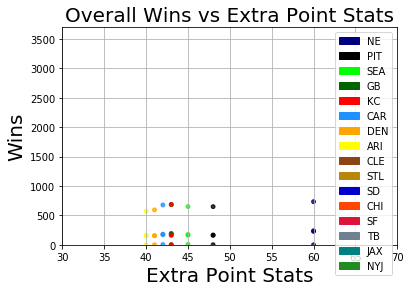

In [144]:
yplot_ST = np.array([XP_list])

xplot_ST = np.array([XP_Array
                     ])
plt.scatter(x=xplot_ST, 
            y=yplot_ST,
            s=15,
            facecolors=colors, 
            alpha=0.8,
            linewidth=1)

plt.grid(True)
plt.legend(handles= handles)
plt.title("Overall Wins vs Extra Point Stats", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.ylim(0,3700)
plt.xlabel("Extra Point Stats", fontsize=20)
plt.xlim(30,70)
plt.figure(figsize=(10,10), dpi=80)
plt.show()